<h1>Comparing Digits using SVM, Naive Bayes, DT & KNN</h1>
<h2>Dataset</h2>
Dataset will be imported from Sklearn's dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

In [1]:
import time    # this is an inbuilt library in Python
from sklearn.datasets import load_digits
digits = load_digits()

Load_digits contains 64 features and 1797 sample data.

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

An 8*8 image which the array corresponds to the pixel, the 0 represents a black pixel and the higher the number the less black on the pixel. You can see the text compare to the image.

In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

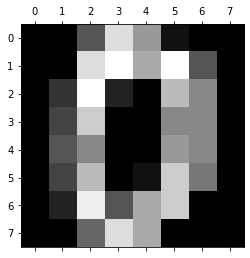

In [6]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [7]:
print(digits.images[5])

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


<Figure size 432x288 with 0 Axes>

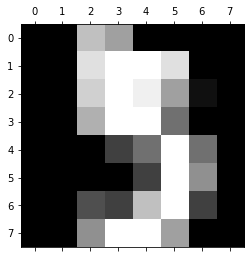

In [8]:
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show()

<Figure size 432x288 with 0 Axes>

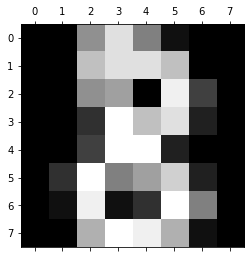

In [9]:
plt.gray() 
plt.matshow(digits.images[8]) 
plt.show()

<Figure size 432x288 with 0 Axes>

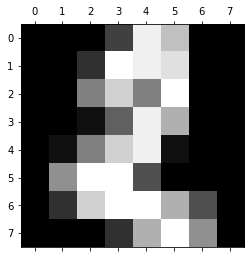

In [10]:
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show()

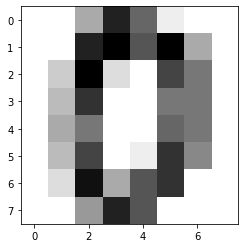

In [11]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

Loads all the images

In [12]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

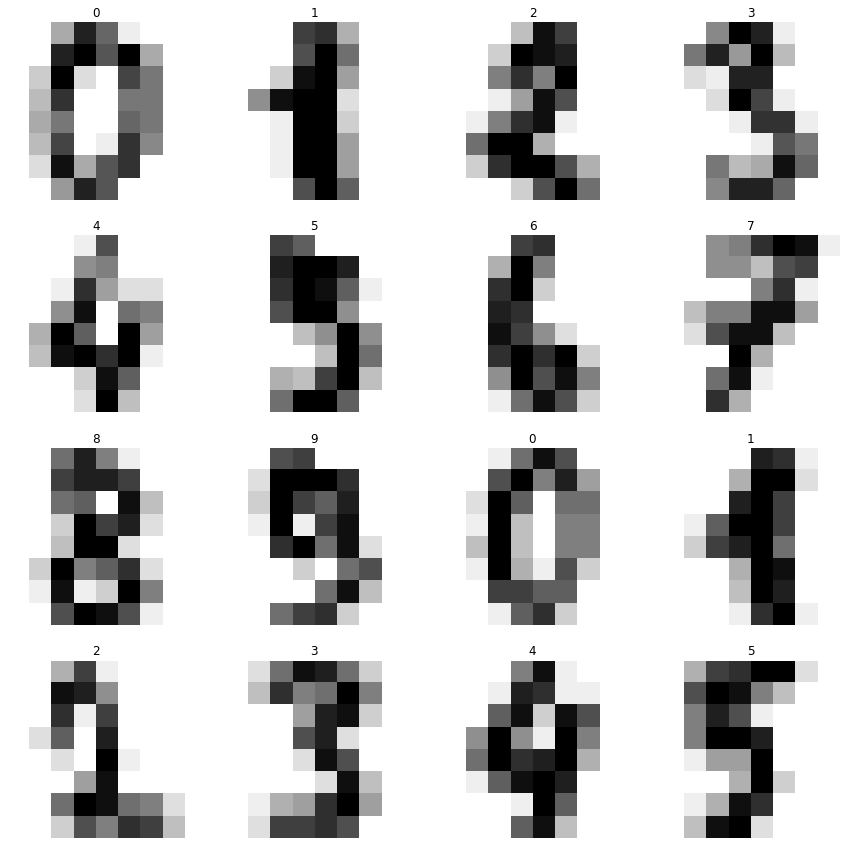

In [13]:
plot_multi(0)

Importing libraries and functions

In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<h2>Data preparation</h2>
Flatterning the image which makes it into 2D array. And the n_samples is the entire dataset will be flattern, reshaped and stored in 8*8 grayscale. 

In [15]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

<h2>Splitting Data into Train and Test</h2>
This will split the data into 50-50, 50% of the overall data will be training and the other 50% will be testing data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.75, shuffle=False)

<H2>Support Vector Machine (SVM) algorithms</H2>


Classification report for classifier <module 'sklearn.svm' from 'B:\\Anaconda\\lib\\site-packages\\sklearn\\svm\\__init__.py'>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       131
           1       0.94      0.93      0.94       137
           2       0.98      0.95      0.97       131
           3       0.99      0.85      0.91       136
           4       0.98      0.95      0.96       139
           5       0.96      0.93      0.95       136
           6       0.98      0.99      0.98       138
           7       0.95      0.99      0.97       134
           8       0.90      0.95      0.92       130
           9       0.83      0.96      0.89       136

    accuracy                           0.95      1348
   macro avg       0.95      0.95      0.95      1348
weighted avg       0.95      0.95      0.95      1348



Confusion matrix:
[[130   0   0   0   1   0   0   0   0   0]
 [  0 128   2   0   0   1   2   0   3   1]
 [  0 

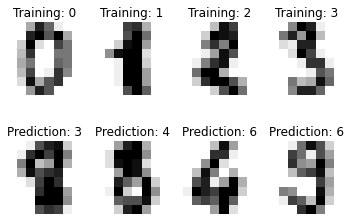

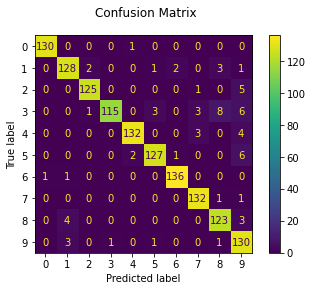

Execution time:  1.5658323764801025 secs


In [17]:
from sklearn import svm # Import svm

start_time = time.time() 

# Create SVC
svmClass = svm.SVC(gamma=0.001)
svmClass.fit(X_train, y_train) # Learns from digits on the training data.
predicted = svmClass.predict(X_test) # Predict the value on the digits on the test data.
_, axes = plt.subplots(2, 4) # Testing the samples and show their prediction.

# Displays the testing data that it used.
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

    # Displays the prediction.
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

    # Produce confusion matrix using the classification_report function to show text showing the classication matrics.
print("\nClassification report for classifier %s:\n%s\n" % (svm, metrics.classification_report(y_test, predicted)))
# Plot a confusion matrix which shows the TRUE digit values and PREDICTED Values
disp = metrics.plot_confusion_matrix(svmClass, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svmClass.score(X_test, y_test)) # Score function allow us to 

plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

<H2>Naive Bayes NB</H2>


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.70      0.47      0.57       137
           2       0.73      0.83      0.78       131
           3       0.94      0.74      0.83       136
           4       0.91      0.76      0.82       139
           5       0.86      0.71      0.78       136
           6       0.98      0.93      0.95       138
           7       0.68      0.87      0.76       134
           8       0.56      0.75      0.64       130
           9       0.61      0.77      0.68       136

    accuracy                           0.78      1348
   macro avg       0.80      0.78      0.78      1348
weighted avg       0.80      0.78      0.78      1348



Confusion matrix:
[[124   0   0   0   4   0   0   0   2   1]
 [  0  65  26   0   4   1   1   0  33   7]
 [  0   2 109   0   0   2   1   0  14   3]
 [  0   1   2 100   0   4   0   2  11  1

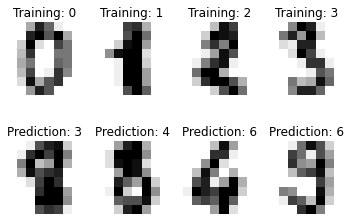

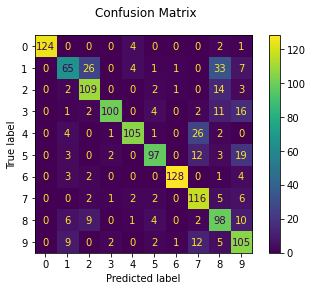

Execution time:  1.8879623413085938 secs


In [18]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
predicted = GNB_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test, y_test))
plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

<H2>Decision Tree</H2>


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       131
           1       0.74      0.36      0.48       137
           2       0.69      0.74      0.71       131
           3       0.85      0.68      0.76       136
           4       0.68      0.73      0.70       139
           5       0.69      0.68      0.68       136
           6       0.73      0.75      0.74       138
           7       0.61      0.74      0.67       134
           8       0.50      0.57      0.53       130
           9       0.60      0.65      0.62       136

    accuracy                           0.68      1348
   macro avg       0.69      0.68      0.68      1348
weighted avg       0.69      0.68      0.68      1348



Confusion matrix:
[[120   0   2   0   2   2   1   0   4   0]
 [  0  49   8   1  20   5   9  19  24   2]
 [  0   1  97   5   5   0  11   3   5   4]
 [  0   0   3  93   2  11   

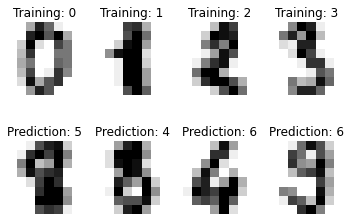

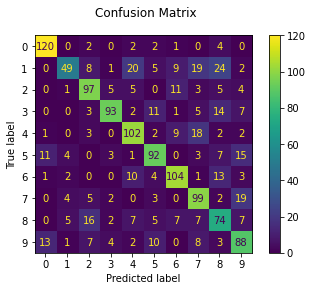

Execution time:  4.202794075012207 secs


In [19]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

<H2>K-Nearest Neighbour (K-NN)</H2>


Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       131
           1       0.86      0.79      0.82       137
           2       0.82      0.93      0.87       131
           3       0.90      0.88      0.89       136
           4       0.99      0.96      0.97       139
           5       0.98      0.94      0.96       136
           6       0.94      0.99      0.96       138
           7       0.96      0.99      0.97       134
           8       0.88      0.87      0.87       130
           9       0.88      0.85      0.86       136

    accuracy                           0.92      1348
   macro avg       0.92      0.92      0.92      1348
weighted avg       0.92      0.92      0.92      1348



Confusion matrix:
[[131   0   0   0   0   0   0   0   0   0]
 [  0 108  15   1   0   0   4   0   8   1]
 [  1   0 122   7   0   0   0   1   0   0]
 [  0   0   

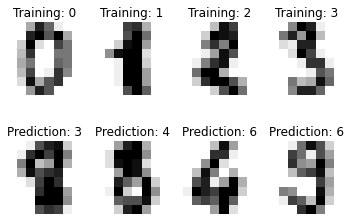

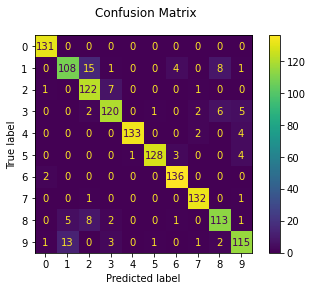

Execution time:  1.9071967601776123 secs


In [20]:
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier

start_time = time.time()

KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)

predicted = KNN_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))

plt.show()

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

<H2>Results</H2>
Thanks to Sklearn's library includeds a lot of other algorithms such as Random Forest and Ensemble Method 

In [21]:
print("\nAccuracy of the SVM: ", svmClass.score(X_test, y_test))
print("\nAccuracy of the Naive Bayes: ", GNB_classifier.score(X_test, y_test))
print("\nAccuracy of the Decision Tree: ", dt_classifier.score(X_test, y_test))
print("\nAccuracy of the KNN: ", KNN_classifier.score(X_test, y_test))


Accuracy of the SVM:  0.9480712166172107

Accuracy of the Naive Bayes:  0.776706231454006

Accuracy of the Decision Tree:  0.6810089020771514

Accuracy of the KNN:  0.9183976261127597
